In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_loc = "meddra_freq.tsv"

In [2]:
data = pd.read_csv(data_loc,
                   sep = "\t",
                   header = None,
                   names = ["STITCH ID 1", 
                            "STITCH ID 2",
                            "UMLS Concept ID", 
                            "Placebo Marker", 
                            "Frequency Description",
                            "Frequency Lower Bound", 
                            "Frequency Upper Bound",
                            "MedDRA Concept Type",
                            "MedDRA UMLS ID",
                            "Side Effect Name"
                           ])
data.fillna("", inplace=True)

In [3]:
data

,STITCH ID 1,STITCH ID 2,UMLS Concept ID,Placebo Marker,Frequency Description,Frequency Lower Bound,Frequency Upper Bound,MedDRA Concept Type,MedDRA UMLS ID,Side Effect Name
0,CID100000085,CID000010917,C0000737,,21%,0.21,0.210,LLT,C0000737,Abdominal pain
1,CID100000085,CID000010917,C0000737,,21%,0.21,0.210,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,,21%,0.21,0.210,PT,C0687713,Gastrointestinal pain
3,CID100000085,CID000010917,C0000737,,5%,0.05,0.050,LLT,C0000737,Abdominal pain
4,CID100000085,CID000010917,C0000737,,5%,0.05,0.050,PT,C0000737,Abdominal pain
5,CID100000085,CID000010917,C0000737,,5%,0.05,0.050,PT,C0687713,Gastrointestinal pain
6,CID100000085,CID000010917,C0000737,,6%,0.06,0.060,LLT,C0000737,Abdominal pain
7,CID100000085,CID000010917,C0000737,,6%,0.06,0.060,PT,C0000737,Abdominal pain
8,CID100000085,CID000010917,C0000737,,6%,0.06,0.060,PT,C0687713,Gastrointestinal pain
9,CID100000085,CID000010917,C0000737,,9%,0.09,0.090,LLT,C0000737,Abdominal pain


In [4]:
name_loc = "drug_names.tsv"
atc_loc = "drug_atc.tsv"

In [5]:
names = pd.read_csv(name_loc, sep="\t", header=None, names = ["CID", "Drug Name"])

In [6]:
names

,CID,Drug Name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate
5,CID100000158,PGE2
6,CID100000159,prostacyclin
7,CID100000160,prostaglandin
8,CID100000175,acetate
9,CID100000187,acetylcholine


In [7]:
merged = pd.merge(names, data, how="left", right_on="STITCH ID 1", left_on="CID")

In [8]:
merged.drop(["CID", "STITCH ID 1", "STITCH ID 2"], axis=1, inplace=True)

In [9]:
merged.columns

Index(['Drug Name', 'UMLS Concept ID', 'Placebo Marker',
       'Frequency Description', 'Frequency Lower Bound',
       'Frequency Upper Bound', 'MedDRA Concept Type', 'MedDRA UMLS ID',
       'Side Effect Name'],
      dtype='object')

In [10]:
merged_agg = merged.groupby(by="Drug Name").mean()

In [11]:
merged_agg_sorted_lower = merged_agg[merged_agg["Frequency Lower Bound"] > 0.25].sort_values(ascending=False, by="Frequency Lower Bound")
merged_agg_sorted_upper = merged_agg[merged_agg["Frequency Upper Bound"] > 0.25].sort_values(ascending=False, by="Frequency Upper Bound")

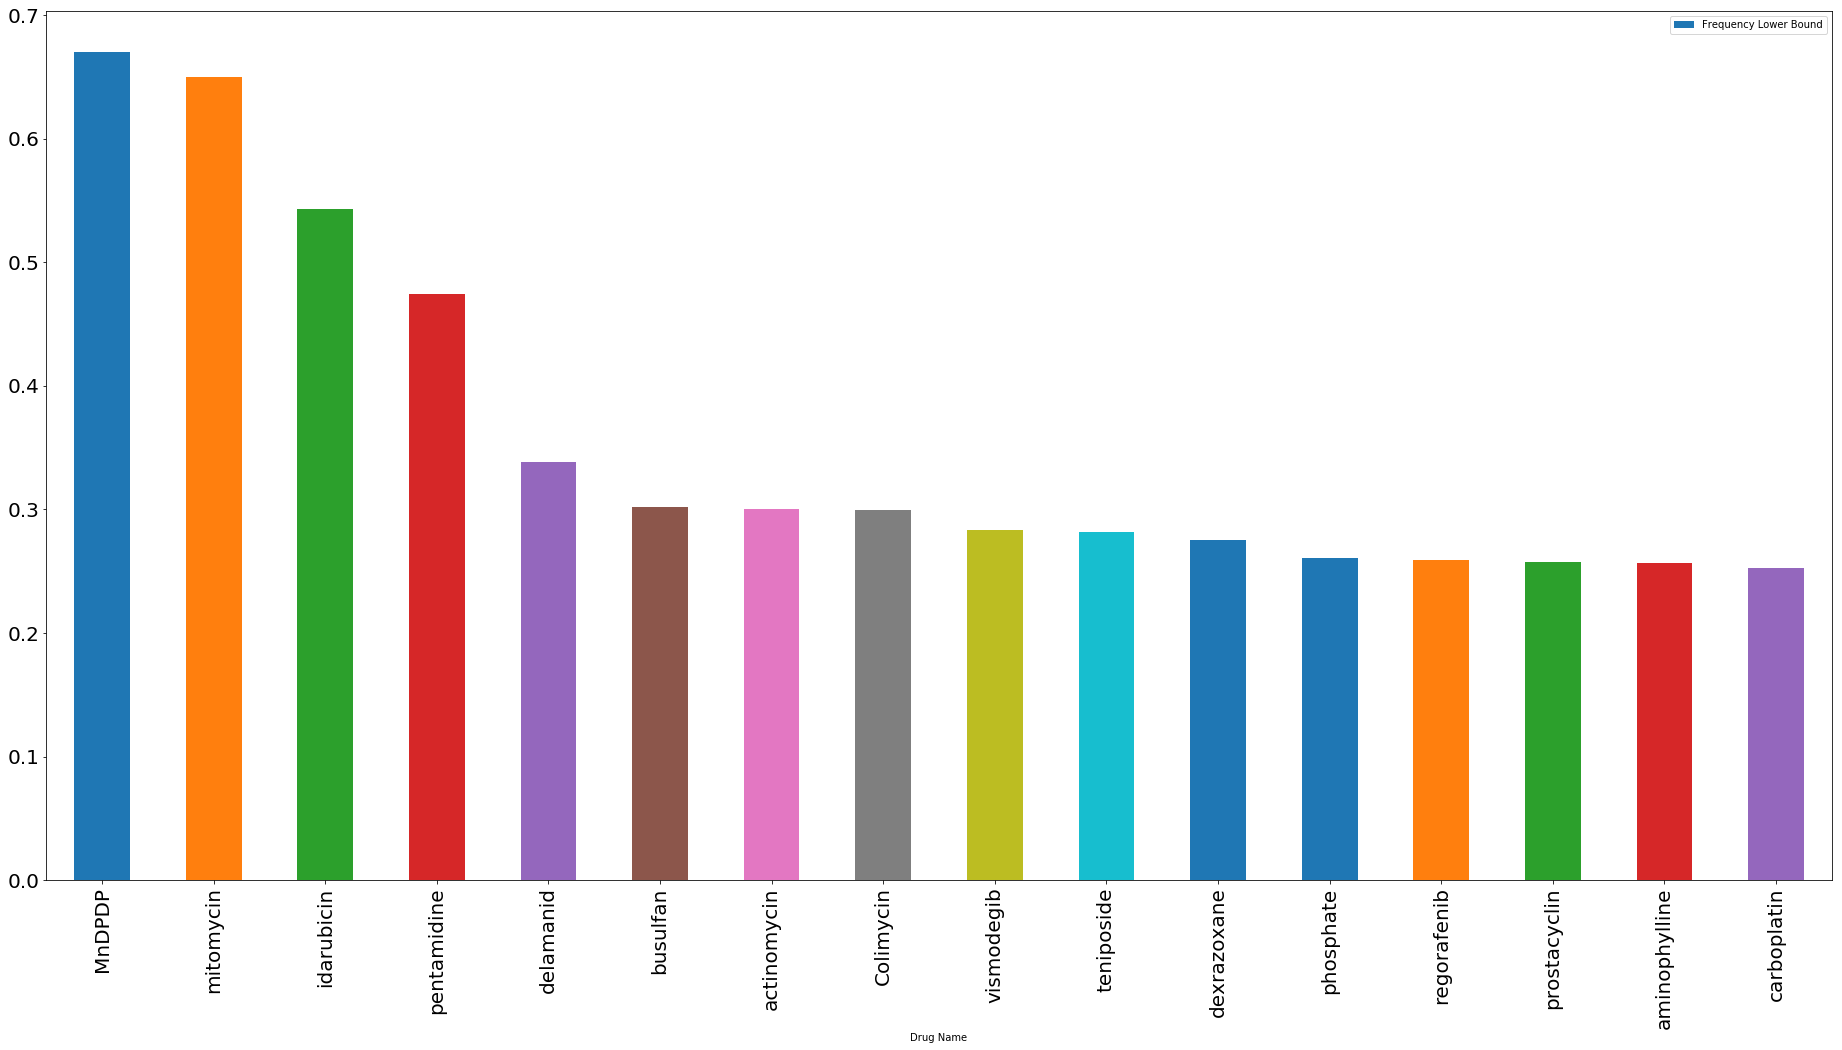

In [12]:
merged_agg_sorted_lower.plot(kind="bar", y="Frequency Lower Bound", figsize=(32,16), fontsize=20)
plt.savefig("fig_lower.png")

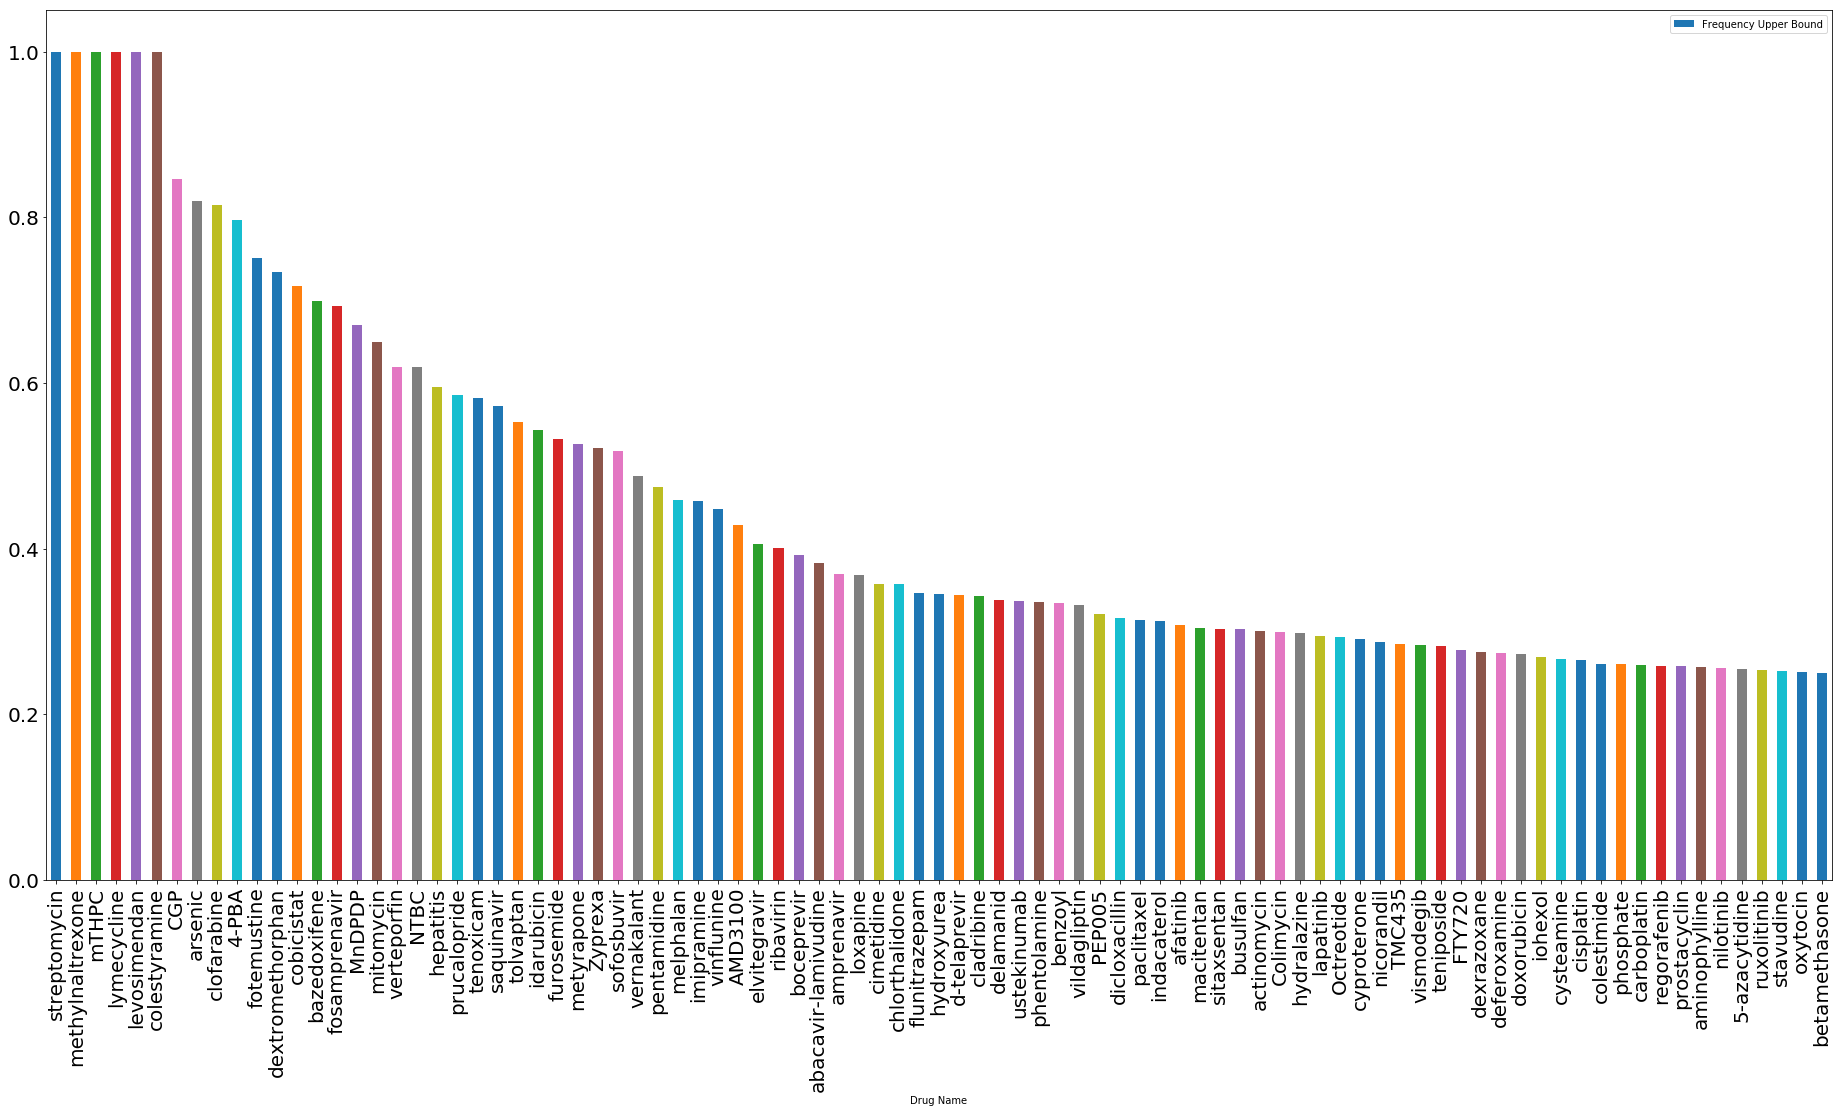

In [13]:
merged_agg_sorted_upper.plot(kind="bar", y="Frequency Upper Bound", figsize=(32,16), fontsize=20)
plt.savefig("fig_upper.png")

In [14]:
merged_agg_se = merged.groupby(by="Side Effect Name").mean()

In [15]:
merged_agg_se_sorted_lower = merged_agg_se[merged_agg_se["Frequency Lower Bound"] > 0.25].sort_values(ascending=False, by="Frequency Lower Bound")
merged_agg_se_sorted_upper = merged_agg_se[merged_agg_se["Frequency Upper Bound"] > 0.60].sort_values(ascending=True, by="Frequency Upper Bound")

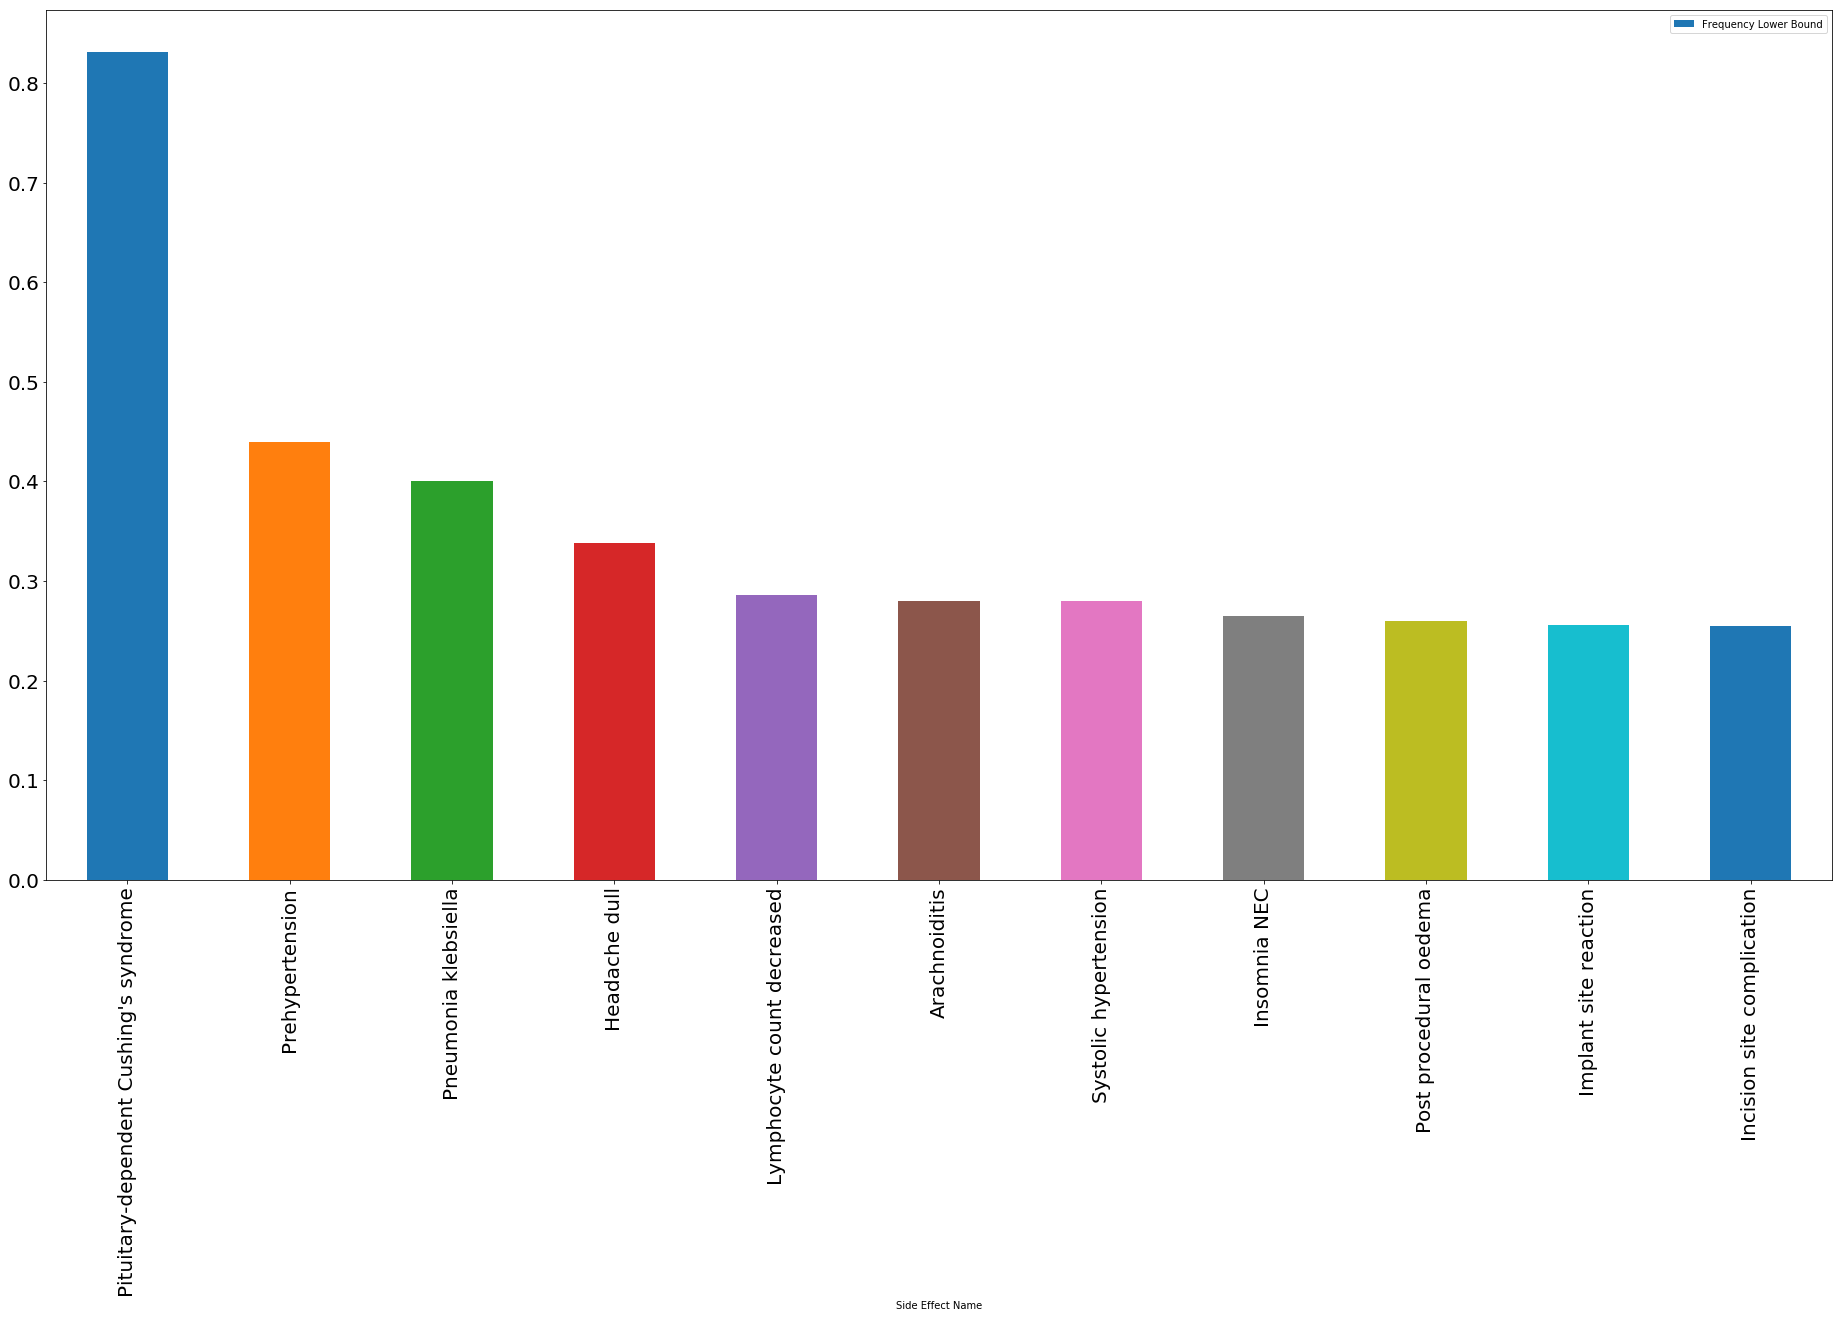

In [16]:
merged_agg_se_sorted_lower.plot(kind="bar", y="Frequency Lower Bound", figsize=(32,16), fontsize=20)
plt.savefig("fig_se_lower.png")

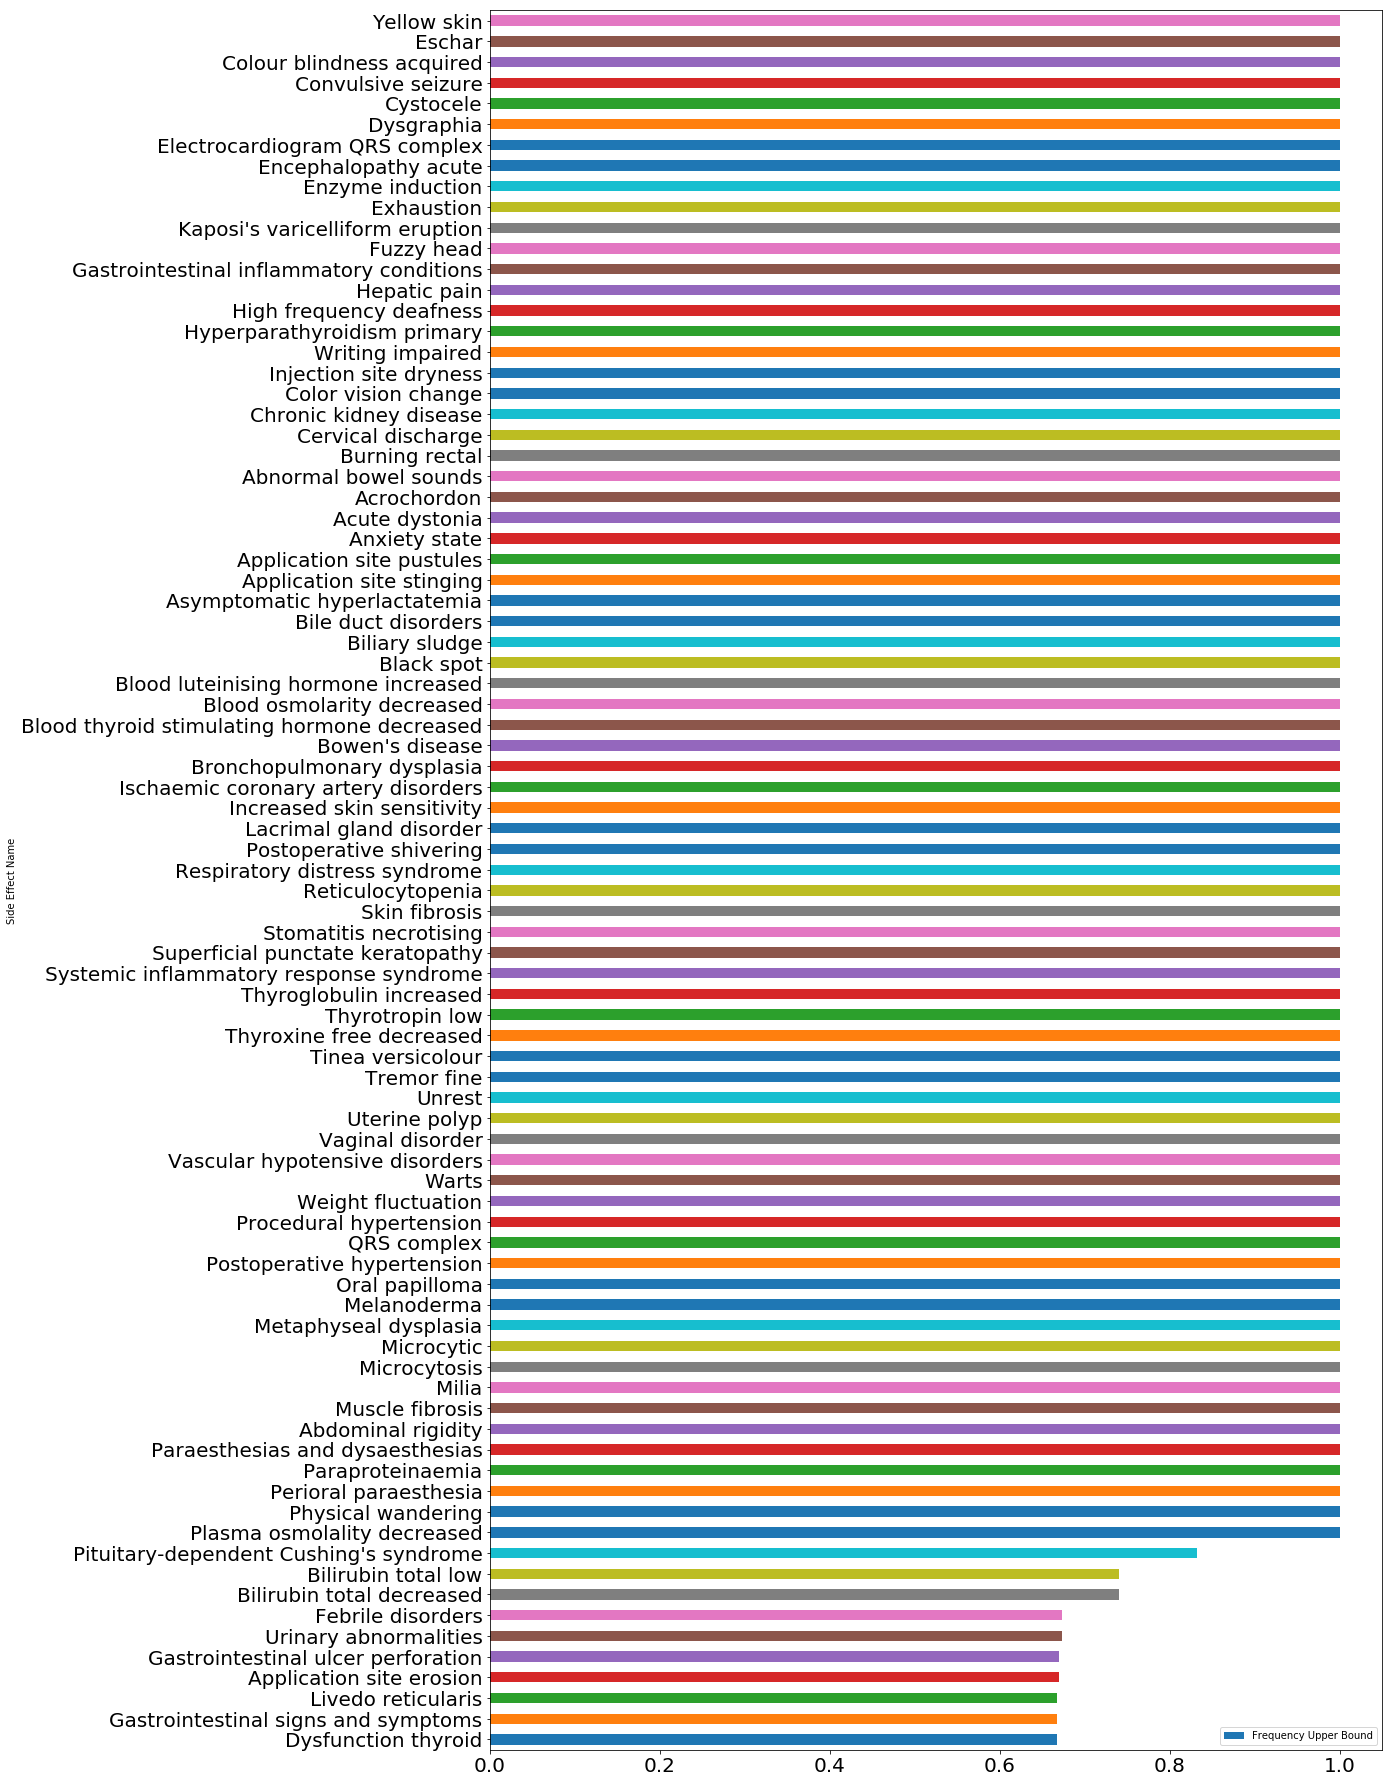

In [17]:
merged_agg_se_sorted_upper.plot(kind="barh", y="Frequency Upper Bound", figsize=(16,32), fontsize=20)
plt.savefig("fig_se_upper.png")

In [18]:
merged_agg_se = merged.groupby(by="Side Effect Name").count()
merged_agg_se_sorted_upper_count = merged_agg_se[merged_agg_se["Frequency Upper Bound"] > 1000].sort_values(ascending=True, by="Frequency Upper Bound")

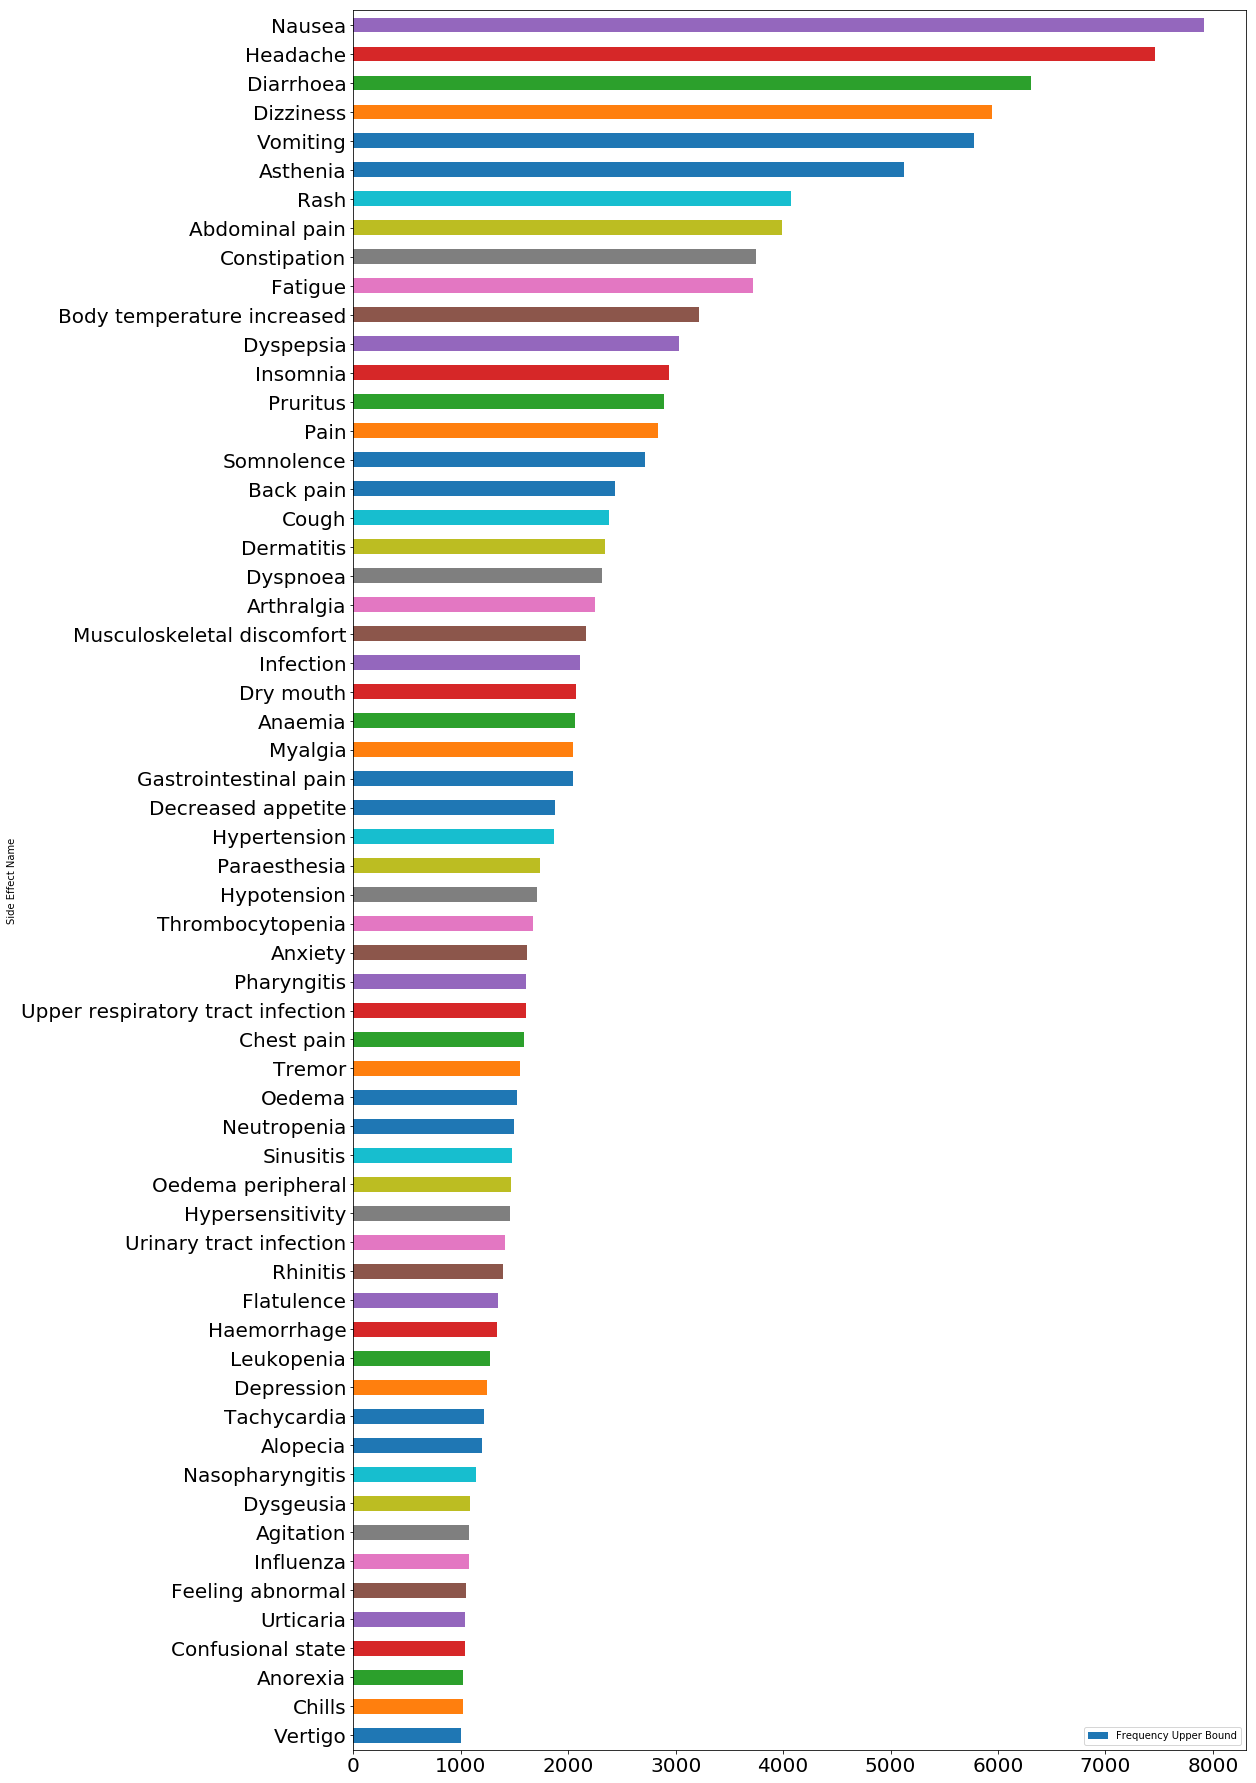

In [19]:
merged_agg_se_sorted_upper_count.plot(kind="barh", y="Frequency Upper Bound", figsize=(16,32), fontsize=20)
plt.savefig("fig_se_upper.png")

In [66]:
merged_agg_se_count = merged.groupby(by="Side Effect Name").count().drop(['Drug Name', 
                                                                          'UMLS Concept ID', 
                                                                          'Placebo Marker',
                                                                          'Frequency Description',
                                                                          'MedDRA Concept Type', 
                                                                          'MedDRA UMLS ID'], axis=1)
merged_agg_se_mean = merged.groupby(by="Side Effect Name").mean()
concat = pd.concat([merged_agg_se_count, merged_agg_se_mean], axis=1)

concat.columns = ["Count Lower", "Count Upper", "Mean Lower", "Mean Upper"]

In [21]:
concat_lower = concat[["Count Lower", "Mean Lower"]]
concat_lower["Mean Lower"] = concat_lower["Mean Lower"].multiply(100)
concat_lower = concat_lower[concat_lower["Count Lower"] > 500].sort_values(ascending=False, by="Count Lower")
concat_lower.reset_index(inplace=True)

C:\Users\Jon\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [23]:
def plotData(concat, x_name, y1_name, y2_name, plot_name):
    margin = 0.5
    fig = plt.figure(figsize=(350,32))

    ax1 = fig.add_subplot(111)
    concat.plot(kind="bar", x=x_name, y=y1_name, width=(-0.5*margin), align="edge", ax=ax1, color="b")
    ax1.set_ylabel(y1_name, color="b", fontsize=32)
    plt.xticks(rotation='vertical', fontsize=30)

    ax2 = ax1.twinx()
    concat.plot(kind="bar", x=x_name, y=y2_name, width=(0.5*margin), align="edge", ax=ax2, color="r")
    ax2.set_ylabel(y2_name, color='r', fontsize=32)


    fig.tight_layout()
    plt.savefig("{}.png".format(plot_name))

In [24]:
plotData(concat_lower, "Side Effect Name", "Count Lower", "Mean Lower", "Lower - Count & Mean")

In [25]:
concat_upper = concat[["Count Upper", "Mean Upper"]]

concat_upper["Mean Upper"] = concat_upper["Mean Upper"].multiply(100)

C:\Users\Jon\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
concat_upper = concat_upper[concat_upper["Count Upper"] > 500].sort_values(ascending=False, by="Count Upper")
concat_upper.reset_index(inplace=True)

In [27]:
plotData(concat_upper, "Side Effect Name", "Count Upper", "Mean Upper", "Upper - Count & Mean")

In [69]:
concat = concat.sort_values(ascending=False, by="Count Upper")

In [70]:
concat.drop("Count Lower", axis=1, inplace=True)

In [71]:
concat.reset_index(inplace=True)

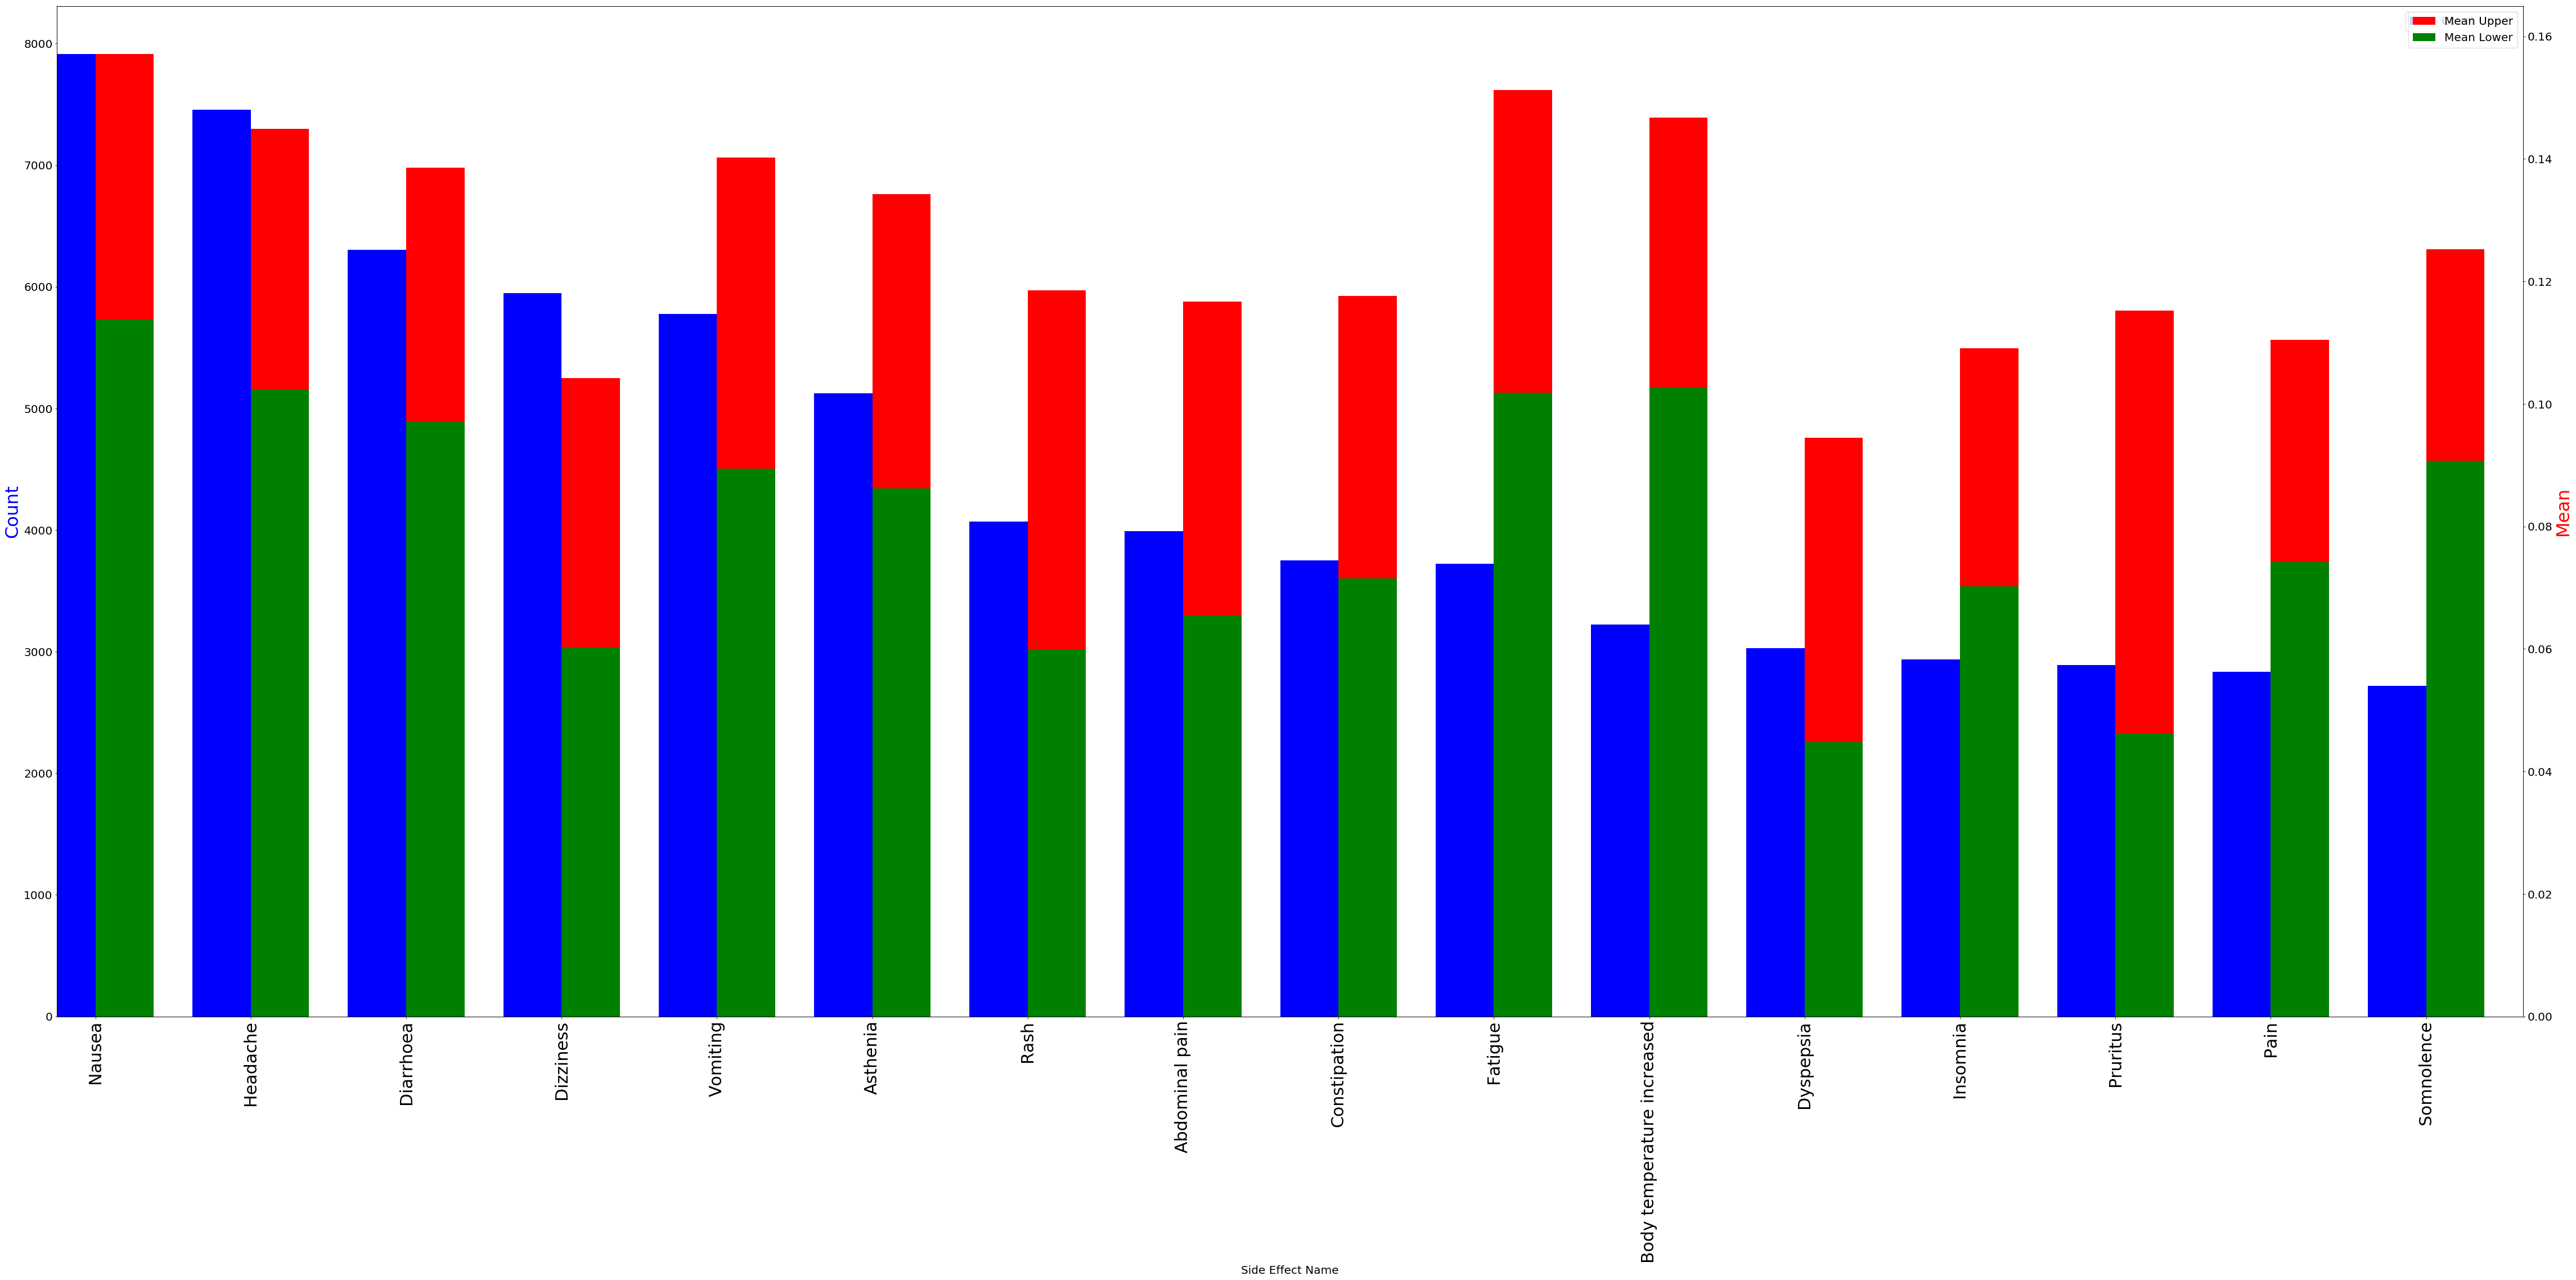

In [72]:
concat_sub = concat[concat["Count Upper"] > 2500]

margin = 0.75
fig = plt.figure(figsize=(64,32))

ax1 = fig.add_subplot(111)
concat_sub.plot(kind="bar", x="Side Effect Name", y="Count Upper", width=(-0.5*margin), align="edge", ax=ax1, color="b")
ax1.set_ylabel("Count", color="b", fontsize=32)
plt.xticks(rotation='vertical', fontsize=30)

ax2 = ax1.twinx()
concat_sub.plot(kind="bar", x="Side Effect Name", y="Mean Upper", width=(0.5*margin), align="edge", ax=ax2, color="r")
concat_sub.plot(kind="bar", x="Side Effect Name", y="Mean Lower", width=(0.5*margin), align="edge", ax=ax2, color="g")
ax2.set_ylabel("Mean", color='r', fontsize=32)

fig.tight_layout()
plt.savefig("Both means.png")

In [75]:
print(concat.median())
print(concat.mean())

Count Upper    6.000
Mean Lower     0.002
Mean Upper     0.010
dtype: float64
Count Upper    73.570131
Mean Lower      0.017120
Mean Upper      0.069014
dtype: float64
